# Clustering Sentences (non-hierachical)

In [32]:
import pandas as pd

df = pd.read_csv("downloads/pos_preds_15052022.csv").sample(frac=0.5)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [107]:
len(df)

115014

In [4]:
!pip install sentence-transformers

  Using cached sentence_transformers-2.2.0-py3-none-any.whl
  Using cached torch-1.10.2-cp36-cp36m-manylinux1_x86_64.whl (881.9 MB)
  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached sentencepiece-0.1.96-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached tokenizers-0.12.1-cp36-cp36m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.6 MB)
  Using cached sacremoses-0.0.53-py3-none-any.whl
  Attempting uninstall: torch
    Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.


In [10]:
from sentence_transformers import SentenceTransformer, util


## Sentence Transformers

In [ ]:

print("Encode the corpus ... get a coffee in the meantime")
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

Encode the corpus ... get a coffee in the meantime


Batches:   0%|          | 0/1798 [00:00<?, ?it/s]

In [108]:
len(embeddings)

115014

In [109]:
import torch

In [110]:
torch.save(embeddings, 'downloads/110kemb.pt')

In [4]:
#embeddings = torch.load("downloads/110kemb.pt")

In [111]:
import numpy as np

embeddings = embeddings.cpu()

# Normalize the embeddings to unit length
corpus_embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True)


### Agglomerative Clustering

### Fast Clustering (40k + sentences)

In [112]:
import gc
import torch

gc.collect()

torch.cuda.empty_cache()

In [113]:
import time
print("Start clustering")
start_time = time.time()

clusters = util.community_detection(corpus_embeddings, threshold=0.75)
print("Clustering took {:.2f} sec".format(time.time() - start_time))

Start clustering
Clustering took 53.78 sec


In [114]:
len(clusters)

1116

In [115]:
#Print for all clusters the top 3 and bottom 3 elements
clus = {}
center_keys = {}
for i, cluster in enumerate(clusters):
#     print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    clus[str(i)] = cluster
    center_keys[cluster[0]] = cluster[1:]
    
    
# for sentence_id in clusters[0:3]:
#     print("\t", sentences[sentence_id])
# print("\t", "...")
# for sentence_id in clusters[-3:]:
#     print("\t", sentences[sentence_id])

In [116]:
center_idxs = [c[0] for c in center_keys.items()]

In [126]:
#centers = centers.drop(columns=["level_0"])
df = df.drop(columns=["level_0"])

In [127]:
centers = df.reset_index().iloc[center_idxs]

In [128]:
centers["problem_id"] = center_idxs

In [129]:
def get_neighbors(problem_id, clus=clus):
    n = []
    for c in clus.values():
        if c[0] == problem_id:
            n = c[1:]
    return n

In [130]:
centers["same_cluster"] = centers["problem_id"].map(get_neighbors)

df=df.reset_index()

In [131]:
centers["DOIs"] = centers["same_cluster"].map(lambda cls: list(df.iloc[cls]["doi"]))

In [166]:
centers['text'].iloc[3]

'The incidence of hepatocellular carcinoma (HCC) is increasing worldwide, largely due to hepatitis B virus (HBV), hepatitis C virus and liver cirrhosis.'

In [133]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 231 kB 39.4 MB/s            
     |████████████████████████████████| 51 kB 13.7 MB/s             
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21430 sha256=1e4082c9c6eadfb0b8331148ad1fe366377426dfcb844ca9f0c4698473d92239
  Stored in directory: /home/ec2-user/.cache/pip/wheels/fc/37/1e/fbbb93fd5d0ce1397c824dad867f09ccebeae472456341cba7
Successfully built keybert
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.
thinc 8.0.13 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", b

In [136]:
from keybert import KeyBERT
kw_model = KeyBERT()


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [192]:
def compare(a, b):
    item1, item2 = a[1], b[1]
    if item1 < item2:
        return -1
    elif item1 > item2:
        return 1
    else:
        return 0
from functools import cmp_to_key
#sorted(mylist, key=cmp_to_key(compare))
def get_top_keywords(text):
    print(text, "--")
    return sorted(kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 3), stop_words='english', nr_candidates=30, top_n=6), key=cmp_to_key(compare), reverse=True)[0][0]

In [194]:
centers

level_0    index                                               text  \
40           62  3419279  The last 4 months have radically changed the w...   
62120     95972  3708143  Obesity is a growing epidemic leading to world...   
4682       7285  3785321  Alzheimer’s disease (AD) is a progressive neur...   
38911     60087  2492603  The incidence of hepatocellular carcinoma (HCC...   
93840    144944   549237  Diabetes is a common disease worldwide with a ...   
...         ...      ...                                                ...   
104185   161019   956882  Vector-borne diseases (VBDs) are globally wide...   
108470   167733   703507  The Burkholderia cepacia complex (Bcc) is a gr...   
110200   170458  2386519  Potato virus A (PVA) and potato virus Y (PVY) ...   
111813   172946  2095907  T-cell acute lymphoblastic leukemia (T-ALL) is...   
114511   177136  2223528  Long-term graft survival is an ongoing challen...   

                                                    s2Url  \
40      https://semanticscholar.org/paper/e971af69f74c...   
62120   https://semanticscholar.org/paper/f925c9d09f04...   
4682    https://semanticscholar.org/paper/a7ad65440413...   
38911   https://semanticscholar.org/paper/0c8e3404a22a...   
93840   https://semanticscholar.org/paper/1a0c62a21b4b...   
...                                                   ...   
104185  https://semanticscholar.org/paper/39ce5cb8f69c...   
108470  https://semanticscholar.org/paper/47e6aa78b5ff...   
110200  https://semanticscholar.org/paper/7970e270785e...   
111813  https://semanticscholar.org/paper/a5e486105863...   
114511  https://semanticscholar.org/paper/22257f4e2dc3...   

                                     doi  \
40            10.1136/gutjnl-2020-321646   
62120           10.1177/1060028014529260   
4682          10.1186/1750-1326-8-S1-O20   
38911          10.3748/wjg.v20.i35.12473   
93840   10.1308/003588412X13171221591655   
...                                  ...   
104185         10.3390/pathogens10050507   
108470         10.1007/s00253-010-2528-0   
110200        10.1094/PDIS-02-21-0233-SC   
111813      10.1182/blood-2010-08-300343   
114511          10.1177/0963689717727542   

                                              journalName  \
40                                                    Gut   
62120                           Annals of Pharmacotherapy   
4682                          Molecular Neurodegeneration   
38911                   World journal of gastroenterology   
93840   Annals of The Royal College of Surgeons of Eng...   
...                                                   ...   
104185                                          Pathogens   
108470             Applied Microbiology and Biotechnology   
110200                                      Plant disease   
111813                                              Blood   
114511                               Cell Transplantation   

                                                    title  \
40      The price of being a doctor during the COVID-1...   
62120         Effect of Bariatric Surgery on Hypertension   
4682    Vascular hypothesis of Alzheimer’s disease: ro...   
38911   Resection of hepatitis B virus-related hepatoc...   
93840   Management of diabetes around emergency and el...   
...                                                   ...   
104185  Exposure to Major Vector-Borne Diseases in Dog...   
108470  Pathogenicity, virulence factors, and strategi...   
110200  Extreme resistance to potato virus A in potato...   
111813  Notch1 inhibition targets the leukemia-initiat...   
114511  Novel Fusion Protein Targeting Mitochondrial D...   

                  fieldsOfStudy    fields  predicts  problem_id  \
40                 ['Medicine']  Medicine       1.0          40   
62120              ['Medicine']  Medicine       1.0       62120   
4682               ['Medicine']  Medicine       1.0        4682   
38911              ['Medicine']  Medicine       1.0       38911

In [193]:
#10:05
centers["topic"] = centers["text"].map(get_top_keywords)

The last 4 months have radically changed the world: the novel coronavirus, named severe acute respiratory syndrome coronavirus 2 or SARS-CoV-2,1 is determining probably the most dramatic health and human crisis that every human being can remember: collapsed hospitals, arrested economy, and above all broken lives. --
Obesity is a growing epidemic leading to worldwide public health concerns. --
Alzheimer’s disease (AD) is a progressive neurodegenerative disease that has emerged as the most prevalent form of late-life dementia in humans [1]. --
The incidence of hepatocellular carcinoma (HCC) is increasing worldwide, largely due to hepatitis B virus (HBV), hepatitis C virus and liver cirrhosis. --
Diabetes is a common disease worldwide with a multitude of complications and high mortality. --
cancer is the second most cause of cancer related death among women all over the world. --
Glioblastoma (GB) represents the most common and aggressive form of malignant primary brain tumour associated 

In [196]:
df2 = centers[["text", "topic", "DOIs", "doi", "title", "journalName", "fieldsOfStudy"]]

In [198]:
df2

text  \
40      The last 4 months have radically changed the w...   
62120   Obesity is a growing epidemic leading to world...   
4682    Alzheimer’s disease (AD) is a progressive neur...   
38911   The incidence of hepatocellular carcinoma (HCC...   
93840   Diabetes is a common disease worldwide with a ...   
...                                                   ...   
104185  Vector-borne diseases (VBDs) are globally wide...   
108470  The Burkholderia cepacia complex (Bcc) is a gr...   
110200  Potato virus A (PVA) and potato virus Y (PVY) ...   
111813  T-cell acute lymphoblastic leukemia (T-ALL) is...   
114511  Long-term graft survival is an ongoing challen...   

                                         topic  \
40             changed world novel coronavirus   
62120         obesity growing epidemic leading   
4682                      alzheimer disease ad   
38911   incidence hepatocellular carcinoma hcc   
93840        diabetes common disease worldwide   
...                                        ...   
104185              vector borne diseases vbds   
108470        burkholderia cepacia complex bcc   
110200                    pva potato virus pvy   
111813       cell acute lymphoblastic leukemia   
114511                   islet transplantation   

                                                     DOIs  \
40      [10.3389/fgwh.2020.572158, 10.22541/au.1589993...   
62120   [10.1016/J.BIOCEL.2005.06.019, 10.1016/B978-0-...   
4682    [10.1007/s10529-020-02915-z, 10.3390/ijms20081...   
38911   [10.1016/S1499-3872(14)60026-6, 10.1007/s11010...   
93840   [10.21276/ijcmsr.2019.4.4.22, 10.21608/absb.20...   
...                                                   ...   
104185  [10.2174/15734099113099990018, 10.32718/NVLVET...   
108470  [10.1179/096805103225001404, 10.1007/s00430-01...   
110200  [10.1007/s10658-017-1317-3, 10.21769/bioprotoc...   
111813  [10.1038/nm.3955, 10.1158/1538-7445.AM2011-288...   
114511  [10.1097/00007890-200112150-00005, 10.1097/01....   

                                     doi  \
40            10.1136/gutjnl-2020-321646   
62120           10.1177/1060028014529260   
4682          10.1186/1750-1326-8-S1-O20   
38911          10.3748/wjg.v20.i35.12473   
93840   10.1308/003588412X13171221591655   
...                                  ...   
104185         10.3390/pathogens10050507   
108470         10.1007/s00253-010-2528-0   
110200        10.1094/PDIS-02-21-0233-SC   
111813      10.1182/blood-2010-08-300343   
114511          10.1177/0963689717727542   

                                                    title  \
40      The price of being a doctor during the COVID-1...   
62120         Effect of Bariatric Surgery on Hypertension   
4682    Vascular hypothesis of Alzheimer’s disease: ro...   
38911   Resection of hepatitis B virus-related hepatoc...   
93840   Management of diabetes around emergency and el...   
...                                                   ...   
104185  Exposure to Major Vector-Borne Diseases in Dog...   
108470  Pathogenicity, virulence factors, and strategi...   
110200  Extreme resistance to potato virus A in potato...   
111813  Notch1 inhibition targets the leukemia-initiat...   
114511  Novel Fusion Protein Targeting Mitochondrial D...   

                                              journalName  \
40                                                    Gut   
62120                           Annals of Pharmacotherapy   
4682                          Molecular Neurodegeneration   
38911                   World journal of gastroenterology   
93840   Annals of The Royal College of Surgeons of Eng...   
...                                                   ...   
104185                                          Pathogens   
108470             Applied Microbiology and Biotechnology   
110200                                      Plant disease   
111813                                              Blood   
114511                               Cell Transplanta

In [197]:
df2.to_csv ("downloads/final110k_16052022.csv", index = False, header=True)

## BERTopic

Visualizations have to be done in Colab (python3.8)
On AWS sagemaker Python version is 3.6 and Python3.8 is bad to install because of cuda version...


In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(embedding_model='sentence-transformers/all-mpnet-base-v2', calculate_probabilities=True, verbose=True)

In [ ]:
topics, probs = topic_model.fit_transform(sentences)

In [ ]:
topic_model.get_topic_info()

Topic  Count                                               Name
0       -1   7142                  -1_rrb_lrb_significantly_compared
1       92    524           92_preterm_birth_pregnancy_breastfeeding
2      325    331                 325_language_lexical_parse_parsing
3      103    244  103_antibiotic_antibiotics_bacteria_antimicrobial
4      347    228        347_randomized_randomised_placebo_conducted
..     ...    ...                                                ...
356     94     10                    94_coli_escherichia_shiga_toxin
357    352     10                                  352_55_age_sem_sg
358    283     10                         283_foot_knee_brace_braces
359    279     10  279_recruitment_retention_acceptability_interv...
360    119     10            119_probiotic_kefiri_lactose_microbiota

[361 rows x 3 columns]

In [ ]:
for t in [1,2,3,4,5]:
    print('\n')
    print(topic_model.get_topic(t))



[('chagas', 0.14040831661877815), ('trypanosoma', 0.05764363064256777), ('trypanosomiasis', 0.051785035239295306), ('african', 0.02603955761615896), ('africa', 0.012058647228130544), ('disease', 0.01141601879882132), ('trypanosomes', 0.010201767290954742), ('trypanosoniasis', 0.010201767290954742), ('trypanosomosis', 0.010201767290954742), ('trypanocidal', 0.010201767290954742)]


[('iodine', 0.20204989105710383), ('idd', 0.09070876944995189), ('deficiency', 0.08313450682477758), ('goiter', 0.04023838967351731), ('iccidd', 0.02501776148382541), ('retardation', 0.01814175388999038), ('biochemical', 0.016544633311393005), ('bangladesh', 0.016237172615316573), ('egypt', 0.015954336192441885), ('saudi', 0.015448679501132085)]


[('toxoplasmosis', 0.12927631099306094), ('toxoplasma', 0.08192420343601008), ('protozoan', 0.051555123096351206), ('toxoplasmic', 0.04594877208174565), ('toxocara', 0.04594877208174565), ('toxocariasis', 0.04594877208174565), ('parasite', 0.04166709361569485), ('

In [ ]:
topic_model.visualize_topics()

In [ ]:
#topic_model.visualize_hierarchy()

## Try above after UMAP to reduce dimensionality ... most cluster methods don't handle dimensionality well

In [ ]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings.cpu()) #cuda error

In [ ]:
!pip uninstall bertopic --yes

Found existing installation: bertopic 0.6.0
Uninstalling bertopic-0.6.0:
  Successfully uninstalled bertopic-0.6.0


In [ ]:
pip install bertopic==0.9.2

In [ ]:
pip show bertopic

Name: bertopic
Version: 0.6.0
Summary: BERTopic performs topic Modeling with state-of-the-art transformer models.
Home-page: https://github.com/MaartenGr/BERTopic
Author: Maarten Grootendorst
Author-email: maartengrootendorst@gmail.com
License: UNKNOWN
Location: /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages
Requires: umap-learn, tqdm, numpy, scikit-learn, torch, hdbscan, pandas, sentence-transformers
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Top2Vec

In [ ]:
from top2vec import Top2Vec

model = Top2Vec(sentences, embedding_model='universal-sentence-encoder')

2021-11-12 13:03:53,780 - top2vec - INFO - Pre-processing documents for training
2021-11-12 13:03:55,169 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-11-12 13:04:09,483 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-11-12 13:04:12,226 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-11-12 13:04:46,585 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-11-12 13:04:48,311 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

90

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(77)


In [ ]:
topic_words

array([['data', 'algorithm', 'structure', ..., 'experimental',
        'language', 'ii'],
       ['placebo', 'cognitive', 'studies', ..., 'randomized',
        'participated', 'mental'],
       ['patients', 'patient', 'studied', ..., 'retrospective',
        'psychological', 'cardiac'],
       ...,
       ['injection', 'viral', 'hepatitis', ..., 'illness', 'protocol',
        'birth'],
       ['asthma', 'lung', 'respiratory', ..., 'conditions',
        'complications', 'causes'],
       ['study', 'studies', 'studied', ..., 'identify', 'chronic',
        'scores']], dtype='<U15')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)


In [ ]:
topic_words

[array(['among', 'of', 'in', 'within', 'on', 'patients', 'over', 'has',
        'at', 'had', 'there', 'an', 'one', 'were', 'while', 'from', 'them',
        'out', 'as', 'have', 'was', 'during', 'given', 'with', 'occurring',
        'by', 'across', 'people', 'individuals', 'persons', 'it', 'some',
        'conducted', 'up', 'having', 'further', 'most', 'even', 'patient',
        'into', 'around', 'through', 'than', 'to', 'about', 'occur', 'the',
        'including', 'are', 'but'], dtype='<U15'),
 array(['drug', 'drugs', 'medication', 'medicine', 'medical', 'alcohol',
        'intervention', 'chronic', 'disorders', 'epidemic', 'inhibitors',
        'disorder', 'ischemia', 'psychiatric', 'prevalence', 'causes',
        'nurses', 'anesthesia', 'depression', 'interventions', 'patients',
        'acid', 'severity', 'syndrome', 'onset', 'drinking', 'physicians',
        'anxiety', 'dysfunction', 'icu', 'hypertension', 'fatal',
        'hepatitis', 'therapy', 'severe', 'smoking', 'liver', 'adv

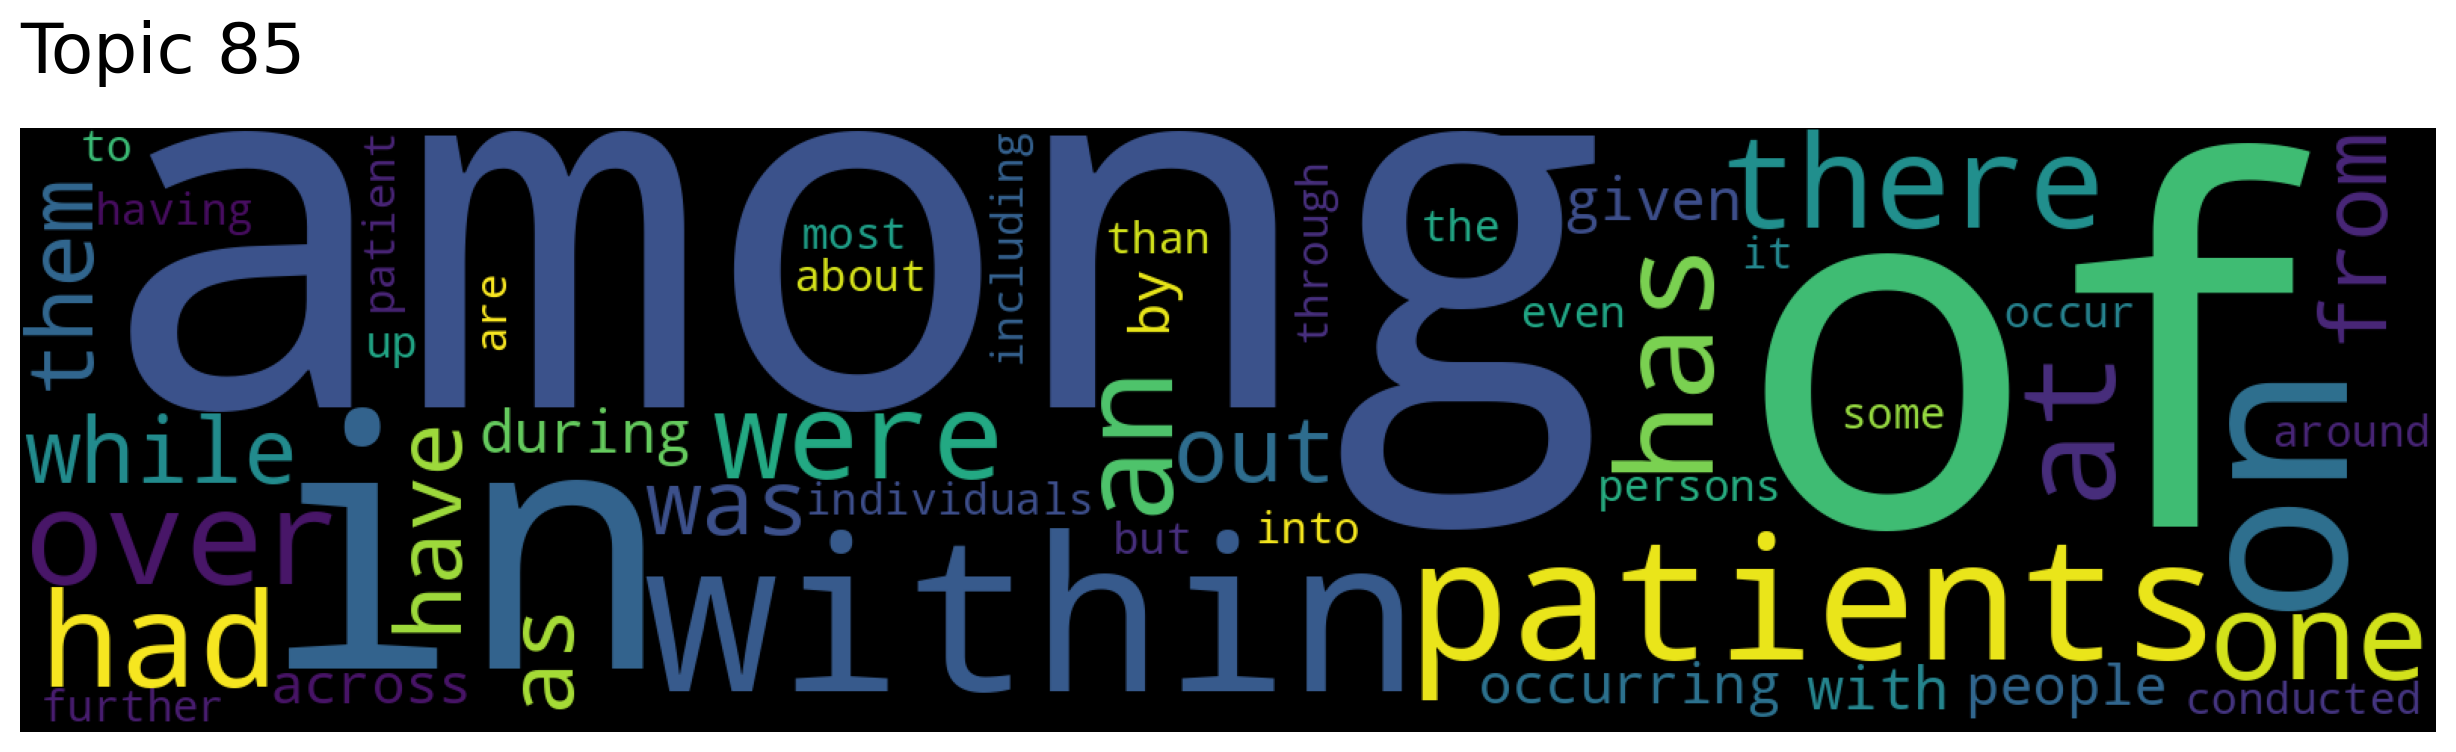

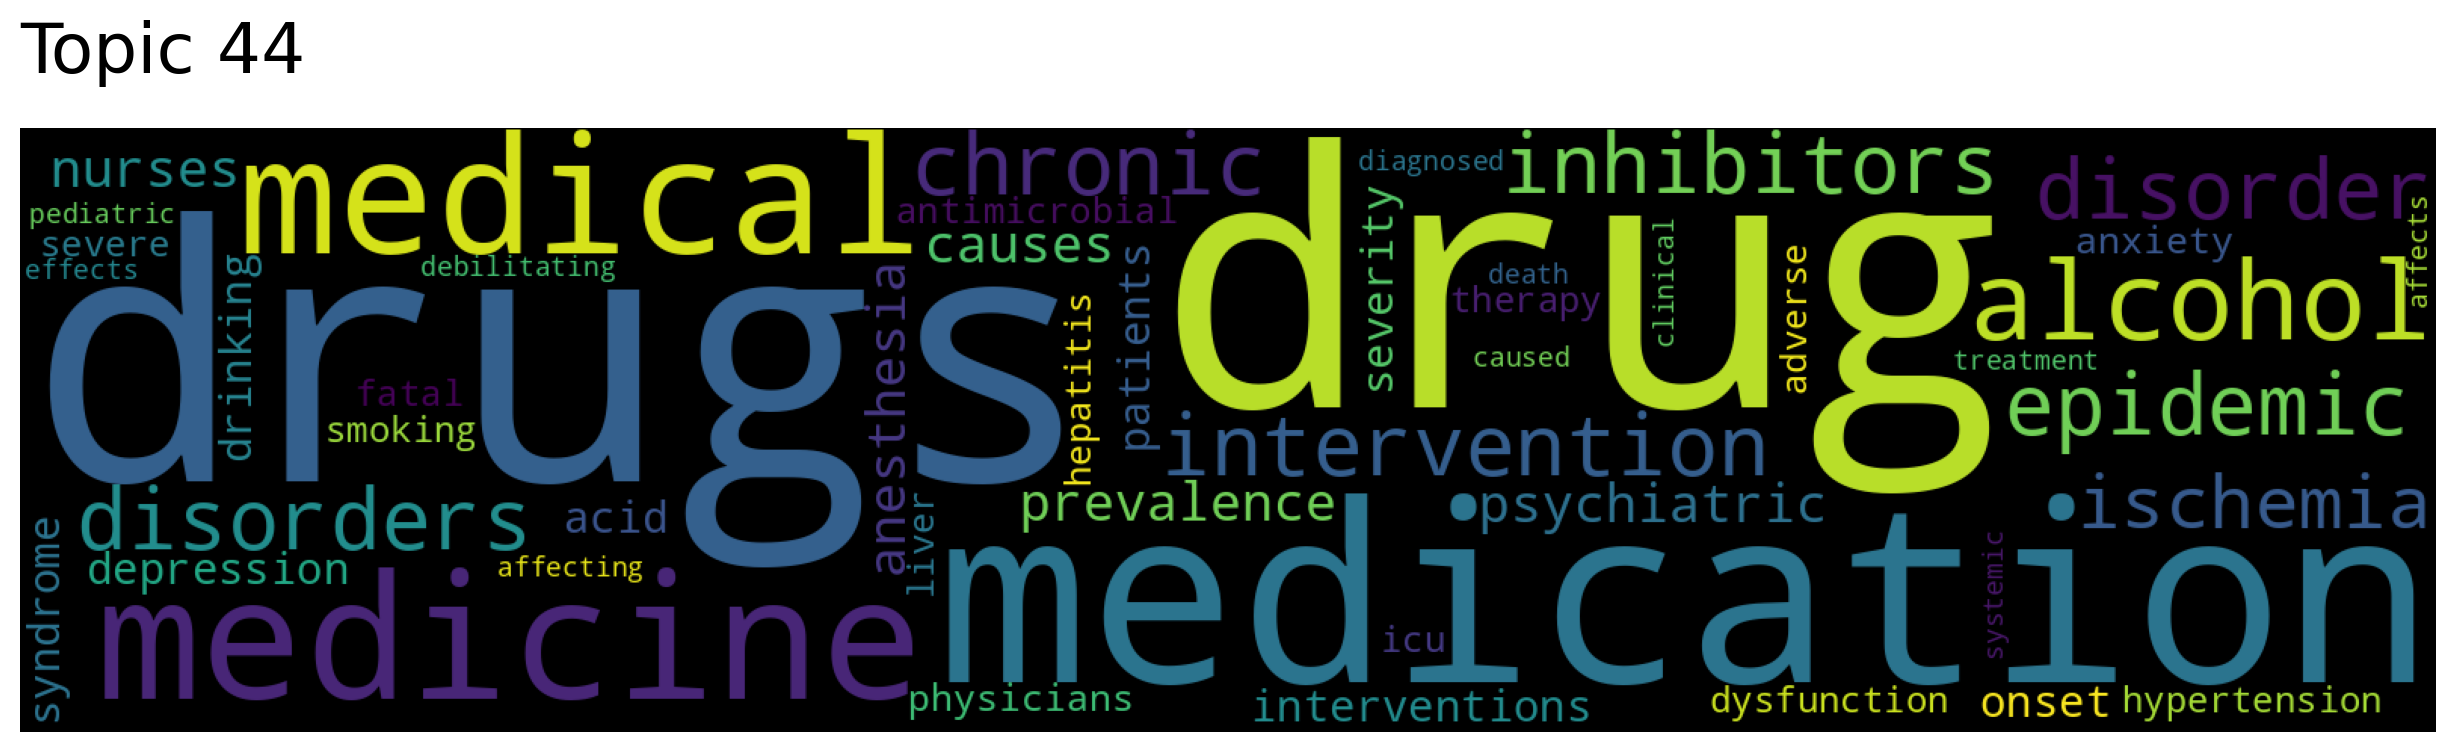

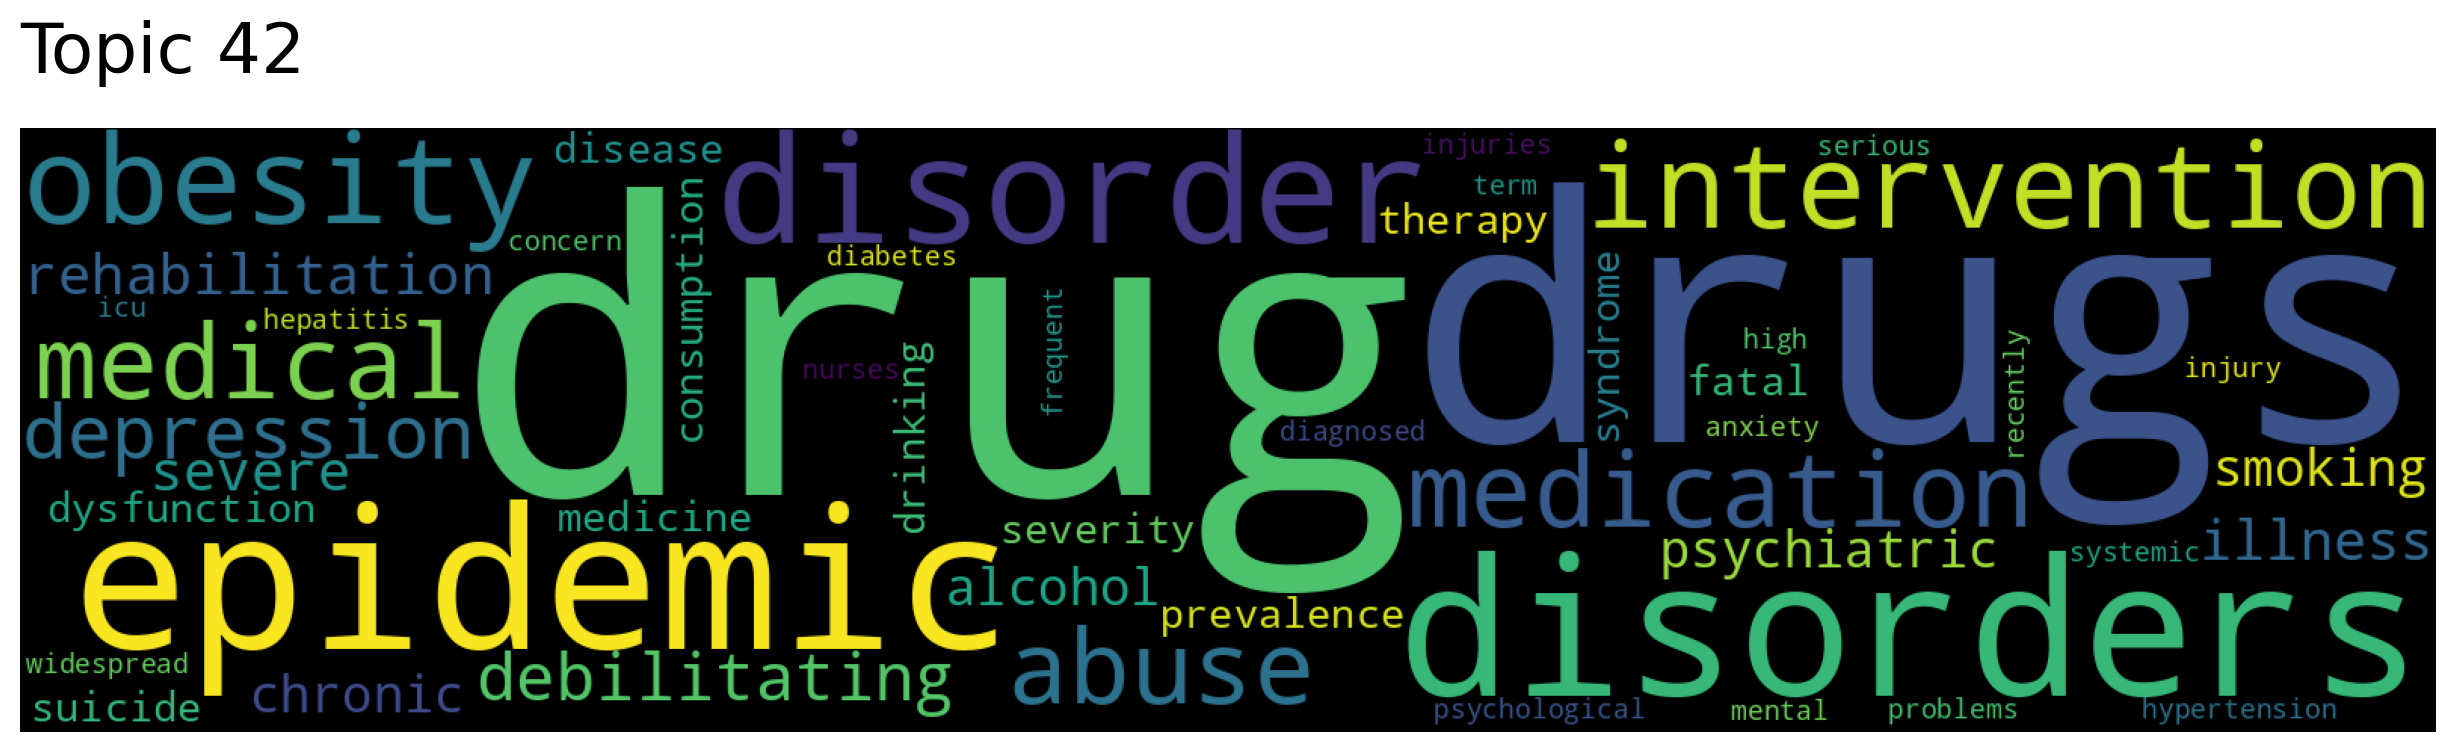

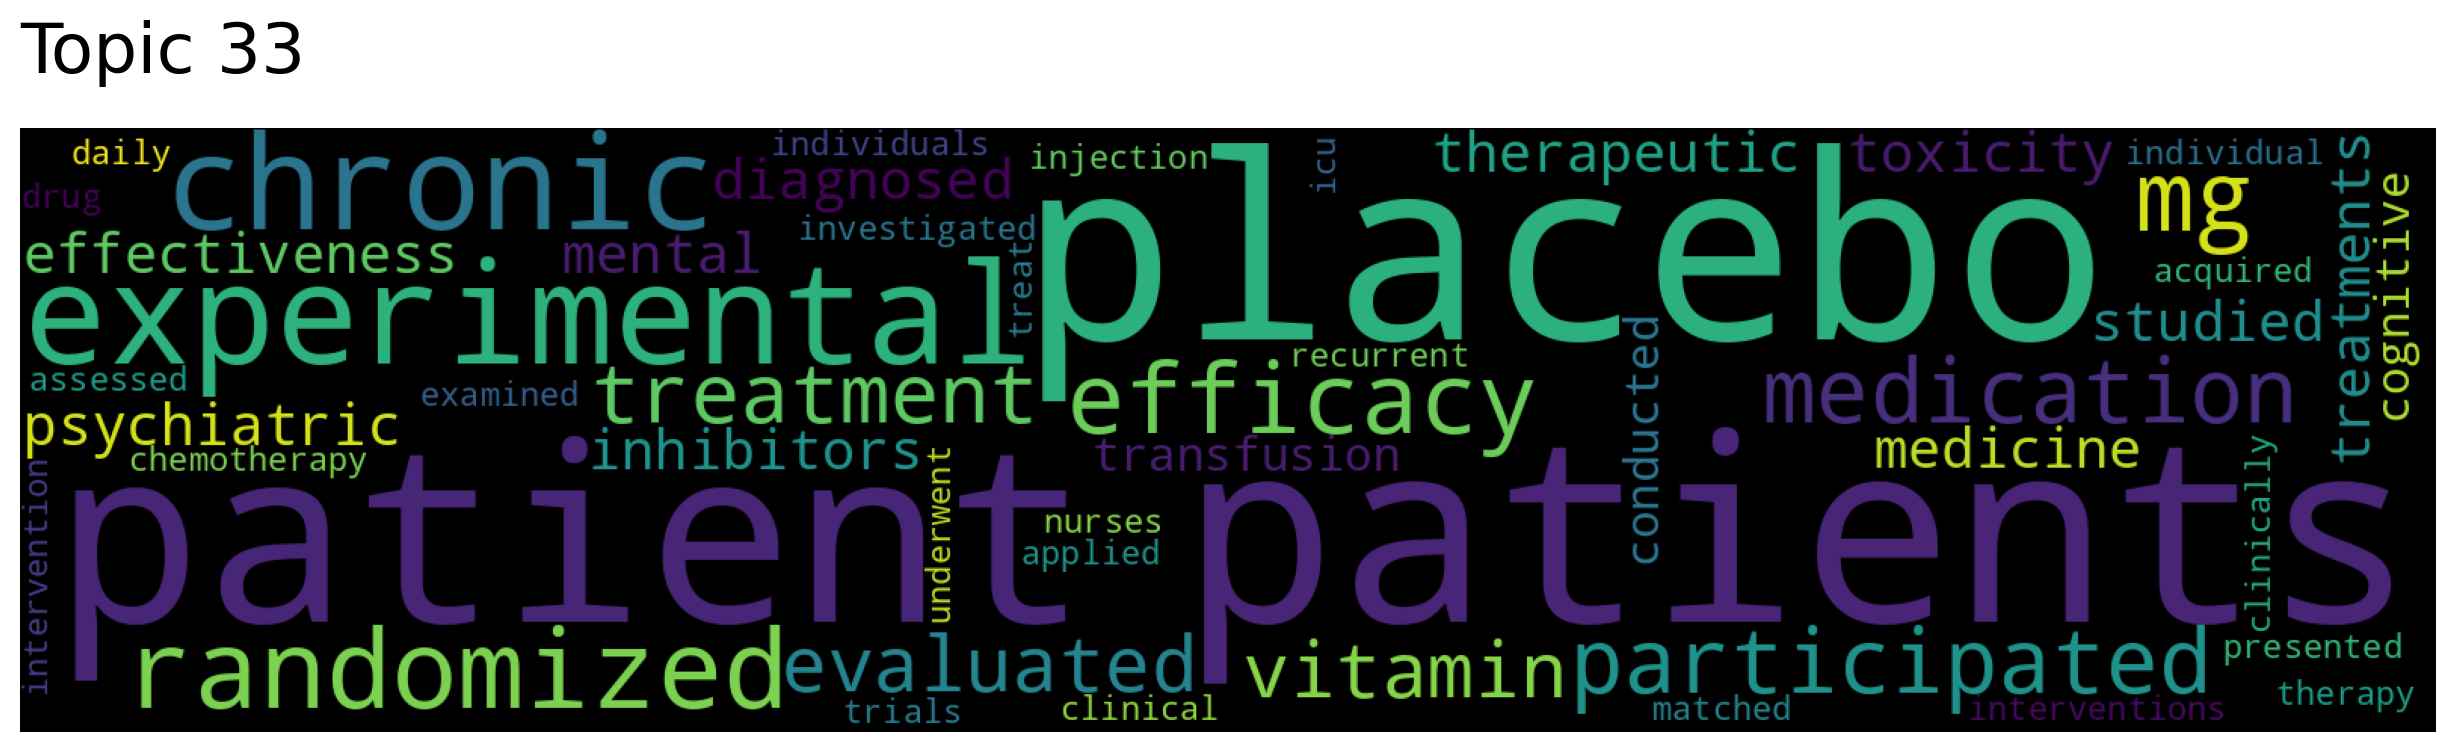

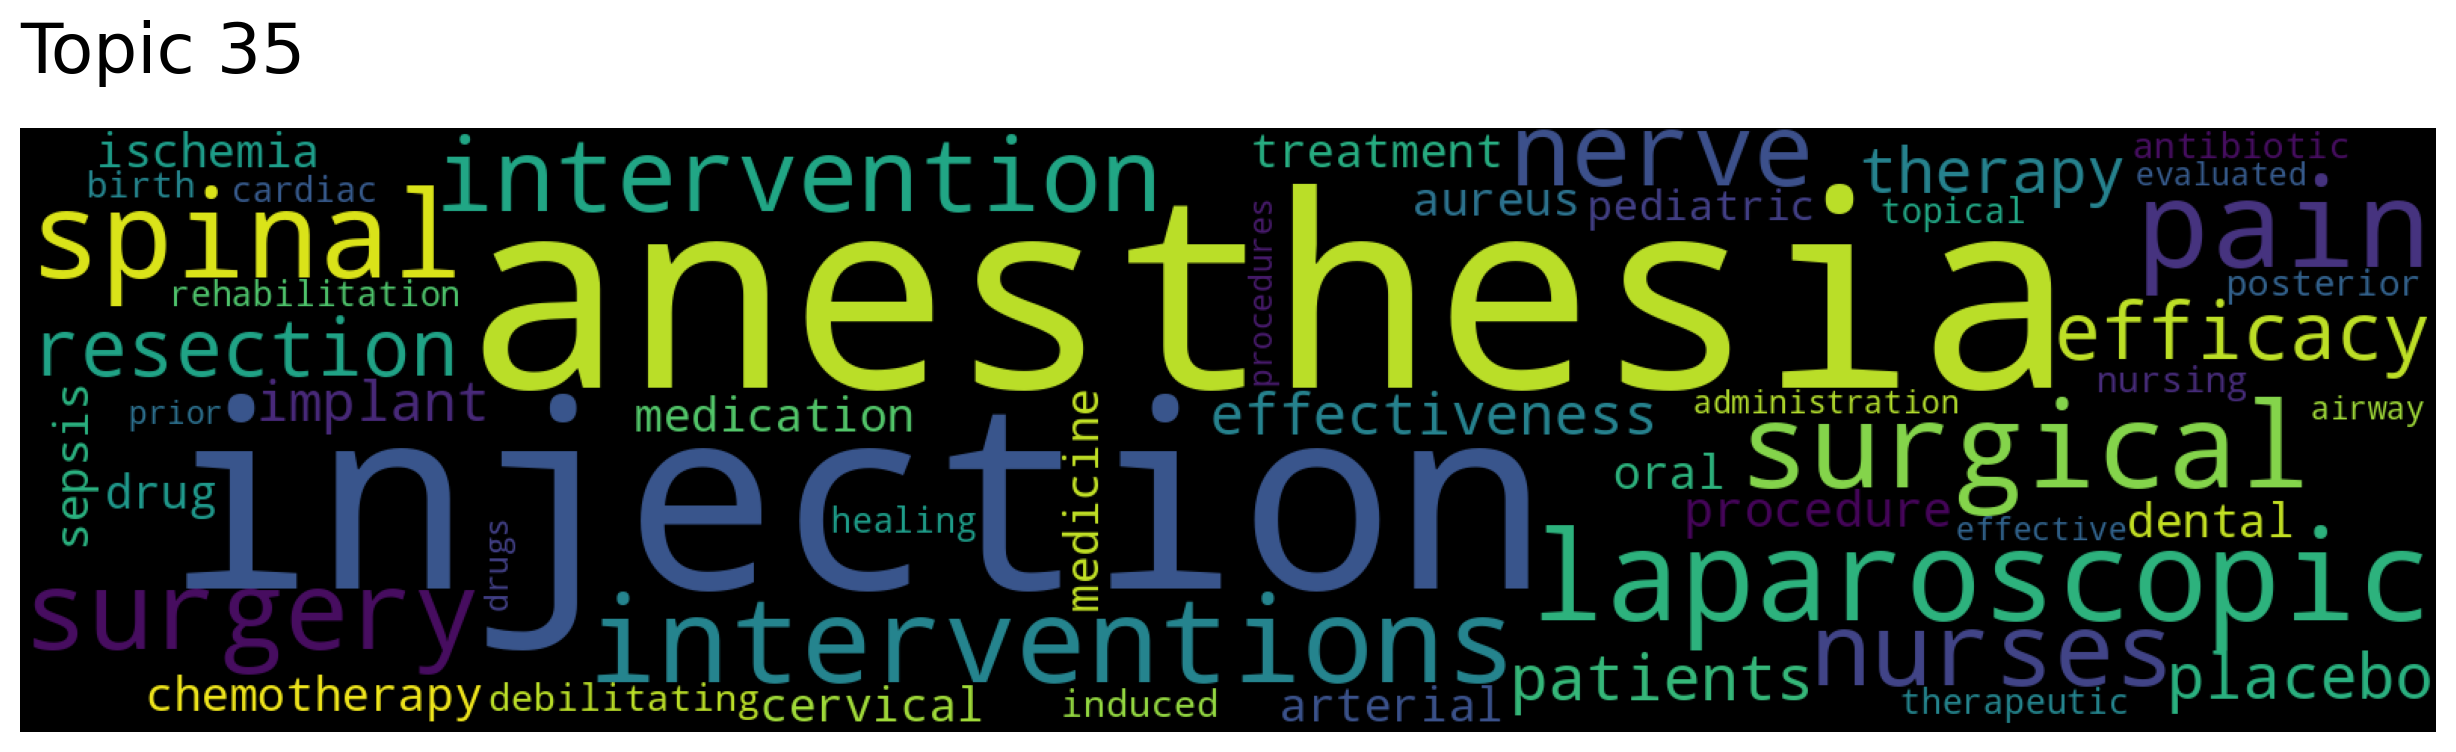

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Since most clustering methods (like LDA) are based on words and word counts ... our dataset (which was done with extracting rules) makes problems:

In topic_num 38 for example, we can see it decides the topic to be: "serious problem" related
...we could filter these topics. There are more topics than rules, so they might just be a small problem (or the rules infiltrate multiple clusters ... since cluster size is set a prior ...)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=38, num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 20636, Score: 0.6788493394851685
-----------
Academic dishonesty has become a serious problem at institutions of higher learning .
-----------

Document: 3087, Score: 0.6698386669158936
-----------
Gap formation has been considered a serious problem by many researchers .
-----------

Document: 18707, Score: 0.6644574999809265
-----------
Attrition of study subjects remains a serious problem in RCTs .
-----------

Document: 11721, Score: 0.6632227897644043
-----------
Coren and Hakstian ( 1990 ) identified a serious methodological problem that arises in auditory research because of interaural correlation .
-----------

Document: 1139, Score: 0.6350462436676025
-----------
Plagiarism is a serious ethical problem among scientific publications .
-----------

Document: 16440, Score: 0.6215311288833618
-----------
Deceit and fraud in medical research is a serious problem for the credibility of published literature .
-----------

Document: 4277, Score: 0.6174214482307434
-----------

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=33, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 252, Score: 0.7839019298553467
-----------
Twenty-two participants with PD and gait dysfunction were randomized to receive D-ER 10mg twice daily or placebo for 4weeks in a crossover design with a 2-week washout period.
-----------

Document: 8924, Score: 0.7808911800384521
-----------
In this phase IIa, 12-week, randomized, double-blind, three-period, four-treatment, incomplete block crossover trial, BI 671800 was administered either as a single 400-mg dose in the morning (A.M.) or evening (P.M.), or 200 mg twice daily (A.M. and P.M.) versus placebo, together with fluticasone propionate (44 μg, two inhalations twice daily).
-----------

Document: 8638, Score: 0.7768117189407349
-----------
In this double-blind phase 3 study, patients were randomised 3:3:2 to placebo (n=488), baricitinib 4 mg once daily (n=487), or adalimumab 40 mg biweekly (n=330) with background MTX.
-----------

Document: 15773, Score: 0.7747718095779419
-----------
Patients (N = 145) with active RA were ra

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=31, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 15921, Score: 0.8620258569717407
-----------
This study is an observational retrospective study.
-----------

Document: 16397, Score: 0.8587977290153503
-----------
This observational study was conducted retrospectively.
-----------

Document: 19824, Score: 0.8554819822311401
-----------
The study was conducted as an observational cross-sectional study.
-----------

Document: 17517, Score: 0.8465601205825806
-----------
The study was an observational, cohort study.
-----------

Document: 10069, Score: 0.843177318572998
-----------
This is a cross-sectional, observational study was conducted.
-----------



In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["diabetes"], num_docs=20)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

AttributeError: 'SentenceTransformer' object has no attribute 'search_documents_by_keywords'

In [ ]:
words, word_scores = model.similar_words(keywords=["cancer"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

carcinoma 0.6299400864524625
chemotherapy 0.5115636699281987
tumors 0.5114513398425593
tumor 0.4922815272044255
illness 0.4841577388566821
disease 0.4621977734891537
colorectal 0.39813017665465344
diabetes 0.3979400605500447
health 0.38523261981957935
depression 0.38502169652389817
death 0.37897240915771246
infection 0.37804526622132173
dysfunction 0.3774285001300006
stress 0.3774044844444605
deaths 0.3714085296895174
fatal 0.3711893020738749
disorder 0.368357163024807
anxiety 0.36508605638353825
traumatic 0.3638851557797911
blood 0.36372690468089247


Since we know the different sources in our dataset, let's try the clustering AGAIN but without the algorithmically labeled sentences (data programming)

In [ ]:
cols = [source for source in df["source"].unique() if "..." not in source] #{...} was the give-away for algorithmic generated
cols

['pm_METHODS',
 'acl_cambridge',
 'pm_CONCLUSIONS',
 'pm_OBJECTIVE',
 'labels_oct7',
 'pm_RESULTS',
 'oct3_labels',
 'predicts_acl_pm2500_vocabed',
 'Oct1_clinical_studies_pm']

In [ ]:
w

In [ ]:
df2 = df[df['source'].isin(cols)]
sent2 = list(df2["text"])

In [ ]:
len(sent2)

10631

In [ ]:
from top2vec import Top2Vec

model2 = Top2Vec(sent2, embedding_model='universal-sentence-encoder')

2021-11-12 14:11:16,316 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-11-12 14:11:17,028 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2021-11-12 14:11:21,507 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-11-12 14:11:22,904 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-11-12 14:11:29,843 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-11-12 14:11:30,302 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model2.get_num_topics()

2

In [ ]:
documents, document_scores, document_ids = model2.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 6912, Score: 0.6765719056129456
-----------
A randomized, double-blind, placebo-controlled, prospective study was performed to assess the effect of dextromethorphan premedication on patients who underwent diagnostic bronchoscopy.
-----------

Document: 1223, Score: 0.6472145318984985
-----------
In the randomized, blinded, sham RIPC (sRIPC) controlled study 51 patients with CHD and GFR less than 80 mL/min/m2, undergoing CAG, were investigated.
-----------

Document: 10351, Score: 0.6471035480499268
-----------
All eligible patients with paraoesophageal lesions on thoracic computed tomography (CT) underwent pulmonologist-performed EUS-B-FNA at two tertiary centres and were included in this prospective observational cohort study.
-----------

Document: 588, Score: 0.6451313495635986
-----------
The aim of this observational cohort study was to investigate the prevalence of depression and cognitive deficits in 104 patients having survived acute TTP.
-----------

Document: 10293,

In [ ]:
from sklearn.cluster import AgglomerativeClustering



# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(sentences[sentence_id])

# for i, cluster in clustered_sentences.items():
#     print("Cluster ", i+1)
#     print(cluster)
#     print("\n")